# Model to find Profitable Variables to Target for Increasing Quality of Wines.

# Importing Packages and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading Dataset

In [2]:
A = pd.read_csv(r"\Users\XYZ\Desktop\Datasets\Data.csv") 
# r for raw string
#A = pd.read_csv("\\Users\\XYZ\\Desktop\\Datasets\\Data.csv")
#A = pd.read_csv(r"/Users/XYZ/Desktop/Datasets/Data.csv")

# Preview of the dataset

In [3]:
A.head()
#A.tail()
#A.head(n)
#A.iloc[rows:rows,columns:columns]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Learning about the data

In [4]:
A.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
A.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Checking for Categorical and Continous Variables

In [6]:
Categorical = []
Continous = []
for Variables in A.columns:
    if A[Variables].dtypes == 'object':
        Categorical.append(Variables)
    else:
        Continous.append(Variables)
print(Categorical)
print(Continous)

[]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


# There are only Continous Variables in the Dataset

# Regression problem. 
Given the set of values for Variables, we have to predict the quality of wine.

In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Performing EDA to find relationship between the data

# Finding Correlation between data for each Variables

In [8]:
A.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


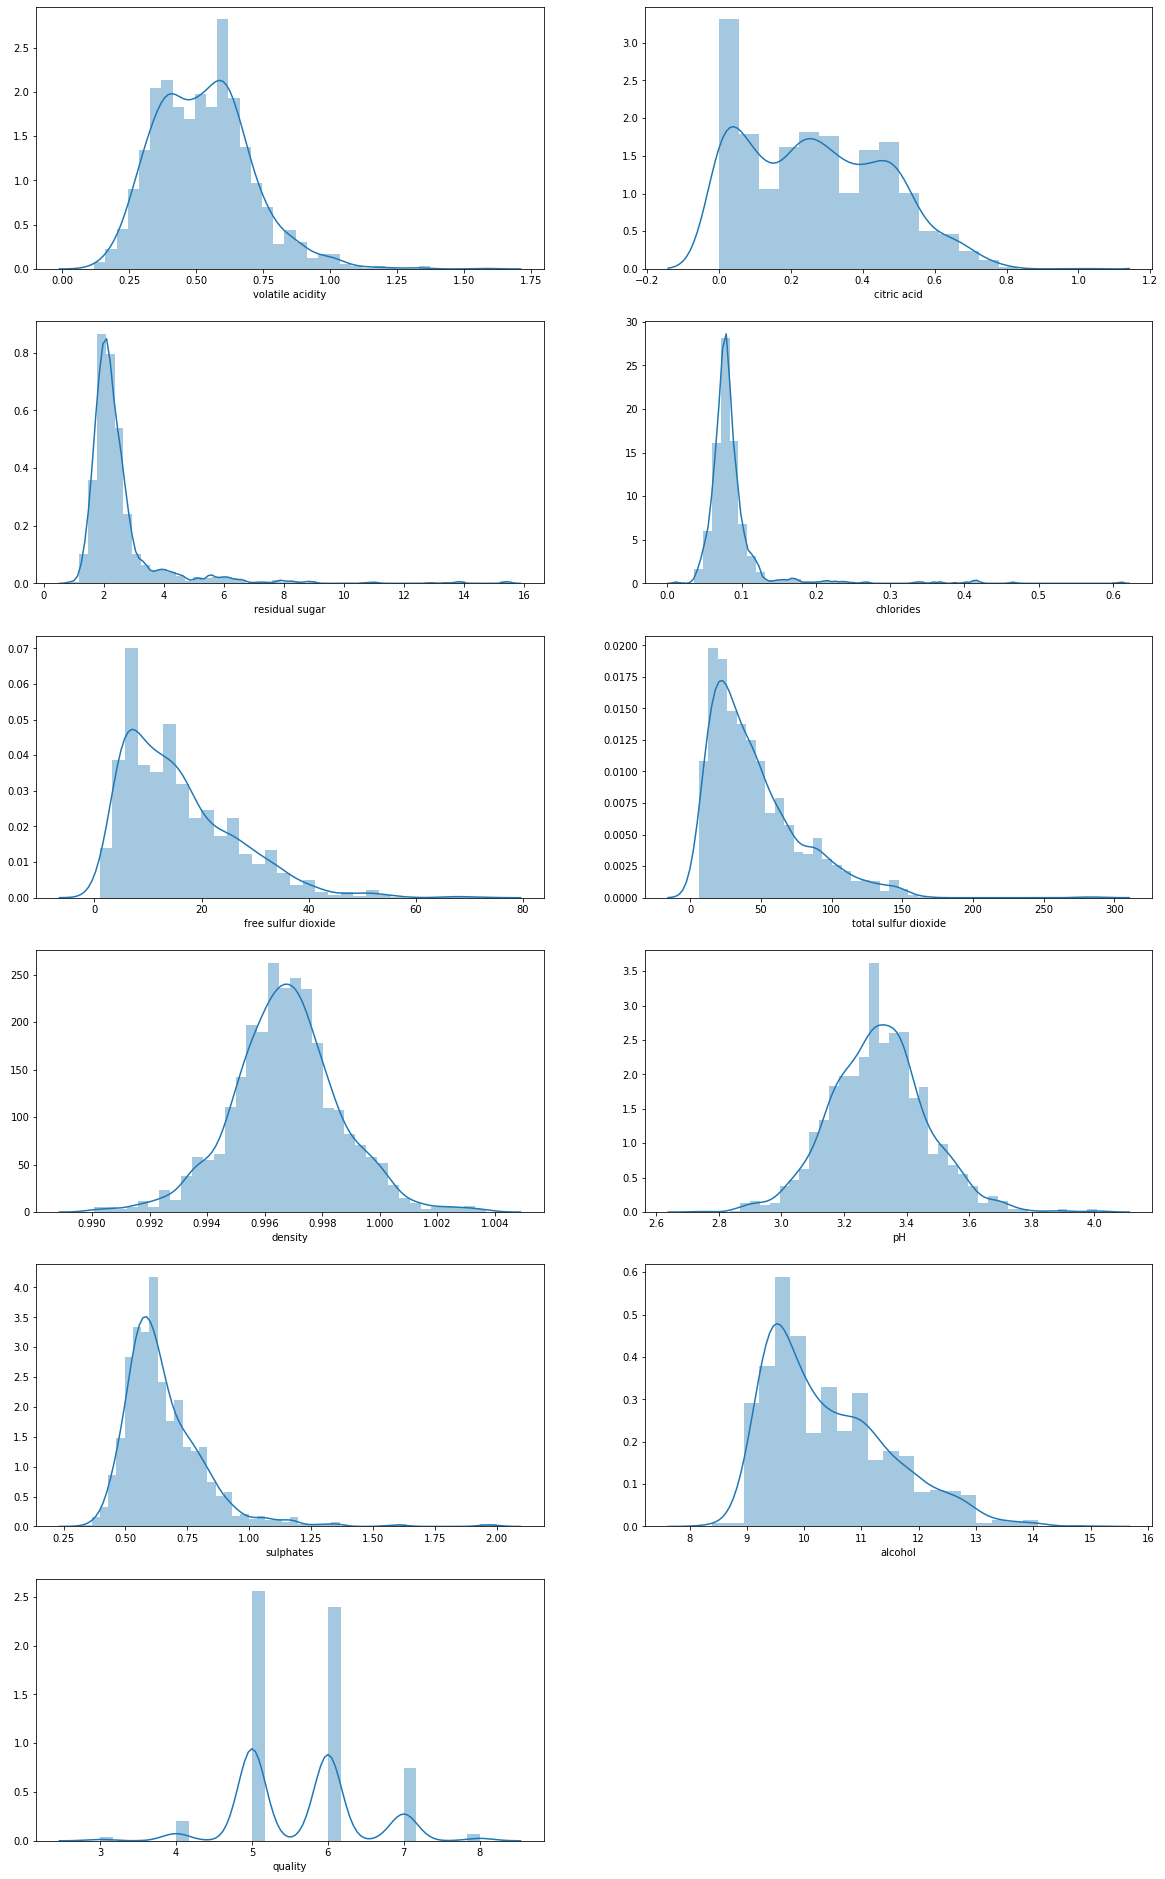

In [9]:
plt.figure(figsize = (20,80))
for i in range(1,len(Continous)):
    plt.subplot(14,2,i)
    sb.distplot(A[Continous[i]])

# Finding Correlation of each Variables with our Target Variable - quality

In [10]:
correlations = A.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [11]:
def get_Variables(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

# Taking Variables with correlation more than 0.05 as input X and quality as target variable Y

In [12]:
Variables = get_Variables(0.05)
print(Variables)
X = A[Variables]
Y = A['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, random_state = 3)

In [14]:
LM = LinearRegression()
LM.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(LM.coef_)

[ 0.01773723 -0.99256049 -0.13962865 -1.59094279  0.00559652 -0.00351973
  0.76859036 -0.43741414  0.81288805  0.30148385]


In [16]:
print(LM.intercept_)

3.2652202416749003


# Prediction of Trained Data and Test Data

In [17]:
Train_Pred = LM.predict(xtrain)
Trained_Pred = metrics.mean_squared_error(Train_Pred, ytrain) ** 0.5
print(Trained_Pred)

0.6525240995947054


In [18]:
Test_Pred = LM.predict(xtest)
Tested_Pred = metrics.mean_squared_error(Test_Pred, ytest) ** 0.5
print(Tested_Pred)

0.6275381539230976


# Calculating Cost Functions

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, Test_Pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, Test_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, Test_Pred)))

Mean Absolute Error: 0.48443407559847146
Mean Squared Error: 0.39380413462920943
Root Mean Squared Error: 0.6275381539230976


In [20]:
coeffecients = pd.DataFrame(LM.coef_,Variables)
print(coeffecients)
# volatile acidity will have negative impact on quality increase in volatile acidity will lead to decrease in 0.99 quality.
# sulphates will have positive impact on quality increase in sulphates will lead to increase in 0.81 quality.

                             0
fixed acidity         0.017737
volatile acidity     -0.992560
citric acid          -0.139629
chlorides            -1.590943
free sulfur dioxide   0.005597
total sulfur dioxide -0.003520
density               0.768590
pH                   -0.437414
sulphates             0.812888
alcohol               0.301484
